In [37]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score

In [38]:
#read dataset csv file.
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
df = train_data.append(test_data, ignore_index=True)

In [39]:
# Shape of the dataset
df.shape

(1000, 2)

In [40]:
# Total no of columns in the dataset
df.columns

Index(['x', 'y'], dtype='object')

In [41]:
# find the datatypes of the features and target variable. 
df.dtypes

x    float64
y    float64
dtype: object

In [42]:
df.head()
#Here our feature varibale is Humidity and target variable is Temperature (C)

,x,y
0,24.0,21.549452
1,0.0,0.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [43]:
# Describe the Data Set
df.describe() # it shows that x has min vlaue 0 which cause problem for us in future so we have to handle it.

,x,y
count,1000.000000,999.000000
mean,53.721157,50.272757
std,113.760577,29.131710
min,0.000000,-3.839981
25%,25.000000,25.071417
50%,50.000000,49.926397
75%,75.000000,74.475252
max,3530.157369,108.871618


In [44]:
# Replace the nan values with median of column 'y'
df['x'] = df['x'].replace(0, np.NaN)

In [45]:
# Check the null values in the dataset
df.isnull().any()

x    True
y    True
dtype: bool

In [46]:
# Check the nan values in the dataset
df.isna().sum()

x    12
y     1
dtype: int64

In [47]:
# Replace the nan values with median of column 'y'
df['x'] = df['x'].replace(np.NaN, df['x'].median())

In [48]:
# Replace the nan values with median of column 'y'
df['y'] = df['y'].replace(np.NaN, df['y'].median())

In [49]:
# Check the null values in the dataset
df.isnull().any()

x    False
y    False
dtype: bool

In [50]:
# Check the nan values in the dataset
df.isna().sum()

x    0
y    0
dtype: int64

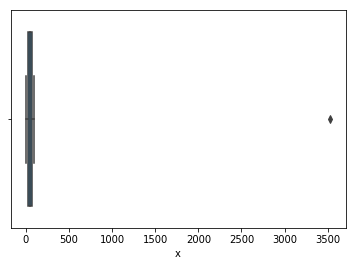

In [51]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['x'])

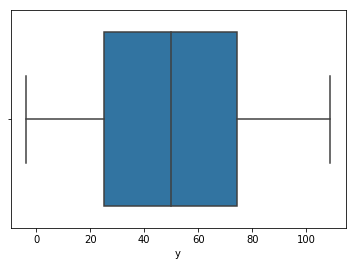

In [52]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df['y'])

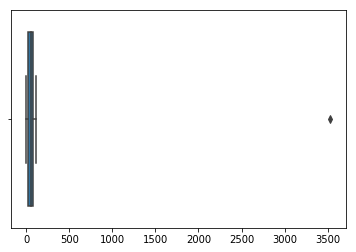

In [53]:
# Boxplot to find the outliers in the Temp column
sns.boxplot(df)

(array([999.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+00, 3.53915737e+02, 7.06831474e+02, 1.05974721e+03,
        1.41266295e+03, 1.76557868e+03, 2.11849442e+03, 2.47141016e+03,
        2.82432590e+03, 3.17724163e+03, 3.53015737e+03]),
 <a list of 10 Patch objects>)

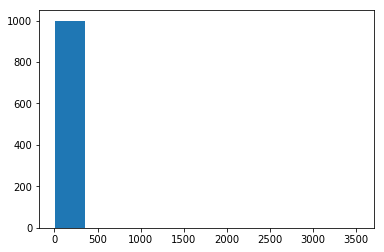

In [54]:
# Histrogram of the feature varibale
plt.hist(df['x'])

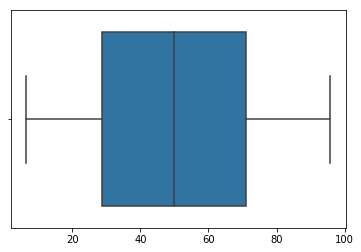

In [55]:
# Remove the outlier from the whole dataset
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

df= remove_outlier(df)
sns.boxplot(df)

/home/deepak/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/deepak/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


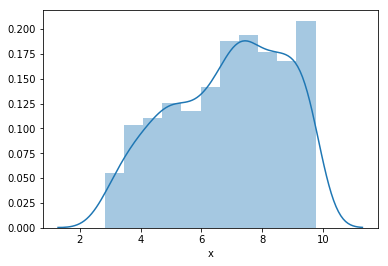

In [69]:
# Distplot of the feature varibale
sns.distplot(df['x'])

(array([ 73.,  92.,  88.,  86., 102., 102.,  82.,  81.,  74.,  82.]),
 array([ 6.3646157 , 15.30790148, 24.25118725, 33.19447303, 42.1377588 ,
        51.08104458, 60.02433035, 68.96761613, 77.9109019 , 86.85418768,
        95.79747345]),
 <a list of 10 Patch objects>)

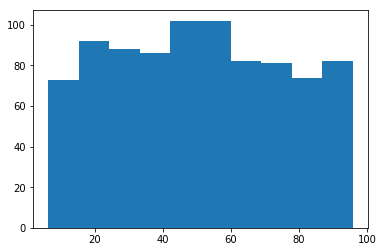

In [57]:
# Histrogram of the feature varibale
plt.hist(df['y'])

/home/deepak/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/deepak/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


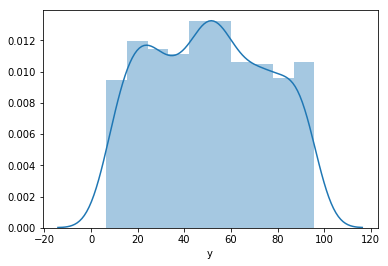

In [97]:
# Distplot of the feature varibale
sns.distplot(df['y'])

In [95]:
# Mean and median of the Humidity column 
print("Mean is", df['x'].mean(), ", Median is ", df['x'].median())

Mean is 6.861207364671618 , Median is  7.0710678118654755


In [94]:
# Mean and median of the Humidity column 
print("Mean is", df['y'].mean(), ", Median is ", df['y'].median())

Mean is 50.59015962174246 , Median is  50.113223725


In [61]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 862 entries, 0 to 999
Data columns (total 2 columns):
x    862 non-null float64
y    862 non-null float64
dtypes: float64(2)
memory usage: 20.2 KB


In [62]:
df.describe()

,x,y
count,862.000000,862.000000
mean,50.564965,50.590160
std,24.773160,25.004959
min,8.000000,6.364616
25%,29.000000,28.472237
50%,50.000000,50.113224
75%,71.000000,71.309535
max,95.000000,95.797473


In [63]:
df.head()

,x,y
0,24.0,21.549452
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875


Skewness is -0.3183650262445144
Mean is 6.861207364671618 , Median is  7.0710678118654755 which shows that column data are skwed data


/home/deepak/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/deepak/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


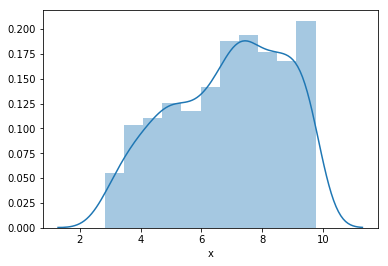

In [64]:
# now transforming feature variable
target = (np.sqrt((df['x'])))
print ('Skewness is', target.skew())
print("Mean is",target.mean(), ", Median is ", target.median(), "which shows that column data are skwed data")
sns.distplot(target)
df['x'] = target

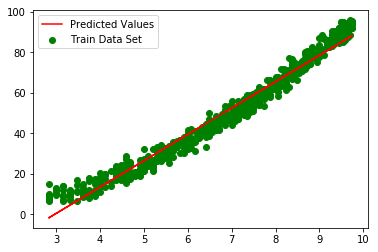

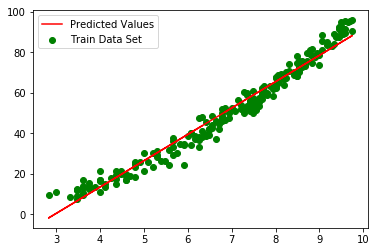

Train data accuracy  88.4100263975118
Test data accuracy  89.50437645836512
R2 score of train dataset  96.95218565020281
R2 score of test dataset  96.7999362772694


In [98]:
#Using Python code
class LinearTrainer:

    def __init__(self):

        # Learning Rate
        self.l_rate = 0.001
        # Total iterations
        self.iterations = 60000

    def trains(self, x_data_train, y_data_train):

        i = 0
        parameters = np.array([0, 1], dtype='f')

        # length of the train and test data sets.
        x_data_train = np.column_stack((np.ones((x_data_train.shape[0], 1)), x_data_train))

        while i <= self.iterations:
            temp1 = ((np.dot(x_data_train, parameters)) - y_data_train)
            temp2 = np.dot(temp1, x_data_train)
            parameters[0] = parameters[0] - ((self.l_rate * np.sum(temp1)) / len(x_data_train))
            parameters[1] = parameters[1] - ((self.l_rate * np.sum(temp2)) / len(x_data_train))
            i += 1

        return parameters

    def classify(self, x_data_test, parameters):

        x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))
        return np.dot(x_data_test, parameters)

    def accuracy(self, y_data_test, y_pred_test):

        total_error = 0
        for i in range(0, len(y_data_test)):
            total_error += abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
        total_error = (total_error / len(y_data_test))
        accuracy = 1 - total_error
        return accuracy * 100

    def plotgraph(self, x_data_test, y_data_test, y_pred, x_data_train, y_data_train):

        plt.scatter(x_data_train, y_data_train, color='g', label='Train Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()
        plt.scatter(x_data_test, y_data_test, color='g', label='Train Data Set')
        plt.plot(x_data_test, y_pred, color='r', label='Predicted Values')
        plt.legend()
        plt.show()


def main():

    x_data_set = np.array(pd.DataFrame(df, columns=['x'])['x'])
    
    y_data_set = np.array(pd.DataFrame(df, columns=['y'])['y'])
    x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_data_set, y_data_set, test_size=0.25, shuffle=False)

    l_t = LinearTrainer()
    parameters = l_t.trains(x_data_train, y_data_train)
    y_prediction = l_t.classify(x_data_test, parameters)
    y_prediction_train = l_t.classify(x_data_train, parameters)
    accuracy = l_t.accuracy(y_data_test, y_prediction)
    accuracy_train = l_t.accuracy(y_data_train, y_prediction_train)

    l_t.plotgraph(x_data_test, y_data_test, y_prediction, x_data_train, y_data_train)
    print("Train data accuracy ", accuracy_train)
    print("Test data accuracy ", accuracy)    
    print("R2 score of train dataset ", (r2_score(y_data_train, y_prediction_train))  * 100)
    print("R2 score of test dataset ",(r2_score(y_data_test, y_prediction))  * 100)

if __name__ == '__main__':
    main()


In [66]:
# # Using sklearn linear regression model
from sklearn.linear_model import LinearRegression
x_data_set = np.array(pd.DataFrame(df, columns=['x'])['x'])
y_data_set = np.array(pd.DataFrame(df, columns=['y'])['y'])

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        x_data_set, y_data_set, test_size=0.25, shuffle=False)

model = LinearRegression()
x_data_train = x_data_train.reshape(len(x_data_train), 1)
y_data_train = y_data_train.reshape(len(y_data_train), 1)
x_data_test = x_data_test.reshape(len(x_data_test), 1)
y_data_test = y_data_test.reshape((len(y_data_test), 1))

reg = model.fit(x_data_train,y_data_train)
reg.score(x_data_test, y_data_test)
y_pred =  reg.predict(x_data_test)
print("R2 score of train dataset", r2_score(y_data_train,y_data_train))
print("R2 score of test dataset", r2_score(y_data_test,y_pred) * 100)

R2 score of train dataset 1.0
R2 score of test dataset 96.82944104506564
